,Runde,Iven_round,Cord_round,Inga_round,Chris_round,Iven,Cord,Inga,Chris
0,0,0,0,0,0,0,0,0,0
1,1,9,0,2,5,9,0,2,5
2,2,0,3,3,6,9,3,5,11


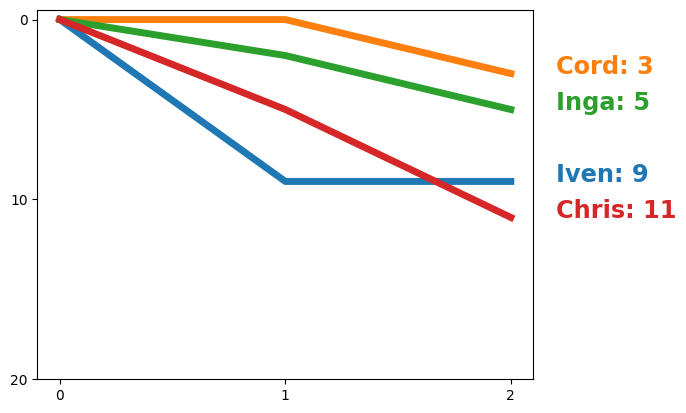

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import math

# DataFrame with point columns, total colums, and round number
df = None

# Column point_columns for every player of a round 
point_columns = []

# Printable column names of total points for every player
players = []

# Column names of total points for every player
total_columns = []

# Player's rank for every round
rank_columns = []

def start(*player_names):
    """ 
    Initialize a new game for the given player names.
    Example:
        start('Pippi', 'Tom', 'Anika', 'Mr. Nelson')
    """
    global df
    global point_columns
    global total_columns
    global players

    players = [*player_names]
    
    allcolumns = ['Runde']

    # Take care of the columns order
    for player in players:
        total_columns.append(player)
        point_columns.append(player + '_round')
        rank_columns.append(player + '_rank')
    allcolumns.extend(point_columns)
    allcolumns.extend(total_columns)
    

    # print(allcolumns)
    df = pd.DataFrame(columns=allcolumns)

    # To see a curves in round 1: Create a round 0 with 0 points for very player. 
    add(*(np.zeros(len(players), dtype=np.int64).tolist()))

def add(*points):
    """Runde hinzufuegen. Parameter sind Punkte der Runde aller Spieler in der richtigen Reihenfolge."""
    global df

    # Round number as String for x axis labeling
    values = [str(len(df.index))]
    # print('values=' + str(values))
    values.extend(points)

    # Calculate new total points
    idx = 0
    for total_column in total_columns:
        point_column = total_column + '_round'
        sum = df[point_column].sum() + points[idx]
        values.append(sum)
        idx += 1

    new_values = pd.DataFrame([values],columns=df.columns)
    df = pd.concat([df, new_values], ignore_index=True)


def plot():
    fig, ax = plt.subplots()   

    # find max for y scaling and round up to the nearest 10. Add 1 to make it printed out
    maximum = (math.ceil(max(df[total_columns].values[-1]) / 10.0) * 10) + 1
    # print('describe:' + str(maximum))

    # Based on https://matplotlib.org/stable/gallery/showcase/stock_prices.html#sphx-glr-gallery-showcase-stock-prices-py
    # loop over user's sum columns
    for nn, column in enumerate(df[total_columns]):

        # Plot each line separately with its own color.
        # print('x=' + str(df.index))
        line, = ax.plot(df['Runde'], df[column], lw=5)

        # Add a text label to the right end of every line. Most of the code below
        # is adding specific offsets y position because some labels overlapped.
        # Get last sum value for actual user
        value = df[column].values[-1]
        #print('y_pos=' + str(y_pos))

        # Use an offset transform, in points, for any text that needs to be nudged
        # up or down.
        offset = 0 / 72
        trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
        trans = ax.transData + trans    

        ax.set_yticks(np.arange(0, maximum, 10))

        
        # Again, make sure that all labels are large enough to be easily read
        # by the viewer.
        # print('df.index[-1]=' + str(df.index[-1]) + ' y_pos=' + str(y_pos) + ' column=' + str(column) + ' color=' + str(line.get_color()) + ' transform=' + str(trans))
        text = column + ': ' + str(value)
        ax.text(df.index[-1] + (df.index[-1]/10), value, text, color=line.get_color(), transform=trans, fontsize='xx-large', fontweight='bold')

    # Show human ordering with the leading player at the top
    ax.invert_yaxis()

# EXAMPLE How to play. Good luck!
# start the game for four player
start('Iven', 'Cord', 'Inga', 'Chris')

# Points of round 1 for every player
add(9,0,2,5)

# next round
add(0,3,3,6)

# etc.

plot()
df